In [38]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np


In [6]:
news_folder = '../../Data/itens/itens'
user_news_folder = '../../Data/files/treino'

In [7]:
def read_all_csv_files_in_folder(folder_path):
    # List to hold DataFrames
    dataframes = []

    # Iterate over all files in the folder
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            # Read the CSV file and append the DataFrame to the list
            df = pd.read_csv(file_path)
            dataframes.append(df)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df


In [14]:
def calculate_average(x):
    return sum([int(i) for i in x.split(",")])/len(x.split(",")) if len(x.split(",")) > 0 else ""

In [29]:
def show_graph(data, title, labels, colors=None):
    if colors is None:
        colors = ['blue', 'orange']
    plt.bar(labels, data, color=colors)
    data.plot(kind='bar', title=title)
    plt.show()

In [17]:
user_interactions = read_all_csv_files_in_folder(user_news_folder)
user_interactions.head()

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,"c8aab885-433d-4e46-8066-479f40ba7fb2, 68d2039c...","1657146417045, 1657146605778, 1657146698738","76, 38, 41","20380, 21184, 35438","50.3, 18.18, 16.46","2, 1, 1","1657146417045, 1657146605778, 1657146698738"
1,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,Non-Logged,60,"3325b5a1-979a-4cb3-82b6-63905c9edbe8, fe856057...","1656684240278, 1656761266729, 1656761528085, 1...","7, 80, 2, 1, 7, 62, 26, 44, 4, 4, 14, 45, 13, ...","6049, 210489, 8672, 10000, 30000, 123007, 9965...","25.35, 45.66, 35.3, 28.05, 36.53, 47.57, 55.33...","1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1...","1656684240278, 1656761266729, 1656761528085, 1..."
2,0adffd7450d3b9840d8c6215f0569ad942e782fb19b805...,Logged,107,"04756569-593e-4133-a95a-83d35d43dbbd, 29b6b142...","1656678946256, 1656701076495, 1656701882565, 1...","0, 0, 0, 0, 0, 44, 0, 0, 2, 1, 0, 0, 0, 44, 0,...","311274, 140000, 32515, 157018, 118689, 159243,...","67.58, 47.22, 41.52, 63.09, 51.38, 65.11, 71.9...","1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1...","1656678946256, 1656701076495, 1656701882565, 1..."
3,c1e8d644329a78ea1f994292db624c57980b2886cfbc2d...,Non-Logged,56,"1f2b9c2f-a2d2-4192-b009-09065da8ec23, 04756569...","1658333312180, 1658404553818, 1658408449062, 1...","8, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1...","182696, 91925, 30000, 273655, 126409, 42980, 1...","58.26, 72.66, 22.57, 59.89, 40.36, 36.35, 14.7...","1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","1658333312180, 1658404553818, 1658408449062, 1..."
4,e777d1f31d4d955b63d60acc13df336d3903f52ab8f8f4...,Non-Logged,4,"bebdeb3e-1699-43e0-a1b8-989f5a6ab679, f4b484a7...","1658766608801, 1658766608801, 1660084035094, 1...","579, 579, 7, 2","801396, 801396, 10000, 10000","78.74, 78.74, 16.71, 9.34","7, 7, 1, 1","1658766608801, 1658766608801, 1660084035094, 1..."


In [ ]:
news_data = read_all_csv_files_in_folder(news_folder)
news_data.head()

In [18]:
user_interactions["numberOfClicksHistoryAvarage"] = user_interactions["numberOfClicksHistory"].apply(calculate_average)

In [20]:
columns = list(user_interactions.columns)
number_of_clicks_index = columns.index("numberOfClicksHistory")
columns.insert(number_of_clicks_index + 1, columns.pop(columns.index("numberOfClicksHistoryAvarage")))

# Apply the new column order to the DataFrame
user_interactions = user_interactions[columns]

In [21]:

# Display the DataFrame to verify the new order
user_interactions.head()

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,numberOfClicksHistoryAvarage,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,"c8aab885-433d-4e46-8066-479f40ba7fb2, 68d2039c...","1657146417045, 1657146605778, 1657146698738","76, 38, 41",51.666667,"20380, 21184, 35438","50.3, 18.18, 16.46","2, 1, 1","1657146417045, 1657146605778, 1657146698738"
1,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,Non-Logged,60,"3325b5a1-979a-4cb3-82b6-63905c9edbe8, fe856057...","1656684240278, 1656761266729, 1656761528085, 1...","7, 80, 2, 1, 7, 62, 26, 44, 4, 4, 14, 45, 13, ...",28.133333,"6049, 210489, 8672, 10000, 30000, 123007, 9965...","25.35, 45.66, 35.3, 28.05, 36.53, 47.57, 55.33...","1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1...","1656684240278, 1656761266729, 1656761528085, 1..."
2,0adffd7450d3b9840d8c6215f0569ad942e782fb19b805...,Logged,107,"04756569-593e-4133-a95a-83d35d43dbbd, 29b6b142...","1656678946256, 1656701076495, 1656701882565, 1...","0, 0, 0, 0, 0, 44, 0, 0, 2, 1, 0, 0, 0, 44, 0,...",8.785047,"311274, 140000, 32515, 157018, 118689, 159243,...","67.58, 47.22, 41.52, 63.09, 51.38, 65.11, 71.9...","1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1...","1656678946256, 1656701076495, 1656701882565, 1..."
3,c1e8d644329a78ea1f994292db624c57980b2886cfbc2d...,Non-Logged,56,"1f2b9c2f-a2d2-4192-b009-09065da8ec23, 04756569...","1658333312180, 1658404553818, 1658408449062, 1...","8, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1...",1.000000,"182696, 91925, 30000, 273655, 126409, 42980, 1...","58.26, 72.66, 22.57, 59.89, 40.36, 36.35, 14.7...","1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","1658333312180, 1658404553818, 1658408449062, 1..."
4,e777d1f31d4d955b63d60acc13df336d3903f52ab8f8f4...,Non-Logged,4,"bebdeb3e-1699-43e0-a1b8-989f5a6ab679, f4b484a7...","1658766608801, 1658766608801, 1660084035094, 1...","579, 579, 7, 2",291.750000,"801396, 801396, 10000, 10000","78.74, 78.74, 16.71, 9.34","7, 7, 1, 1","1658766608801, 1658766608801, 1660084035094, 1..."


In [26]:
avarageClicks = float(user_interactions["numberOfClicksHistoryAvarage"].mean())
avarageClicks

10.665912037198524

In [28]:
#get how many users have more than the avarage of clicks
moreClicks = user_interactions[user_interactions["numberOfClicksHistoryAvarage"] > avarageClicks].shape[0]
lessClicks = user_interactions[user_interactions["numberOfClicksHistoryAvarage"] <= avarageClicks].shape[0]

(165689, 412253)

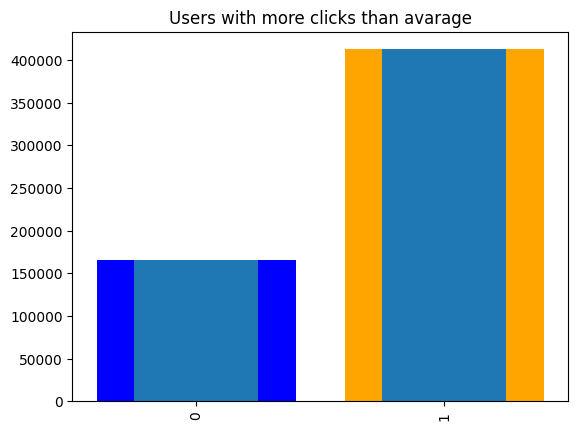

In [32]:
show_graph(pd.Series([moreClicks, lessClicks]), "Users with more clicks than avarage", ["More Clicks", "Less Clicks"])

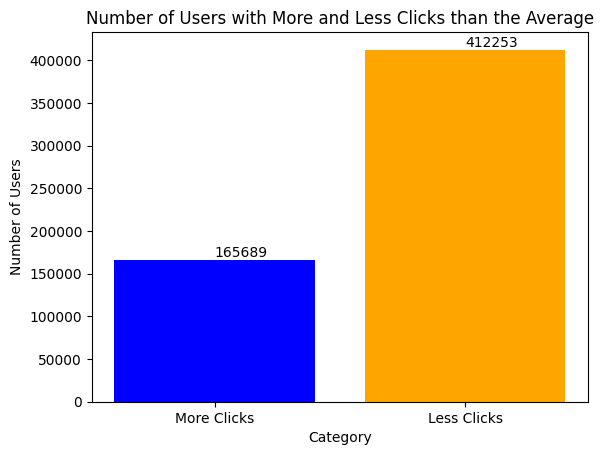

In [34]:
# Data for the bar chart
labels = ['More Clicks', 'Less Clicks']
counts = [moreClicks, lessClicks]

# Create the bar chart
bars = plt.bar(labels, counts, color=['blue', 'orange'])

# Add title and labels
plt.title('Number of Users with More and Less Clicks than the Average')
plt.xlabel('Category')
plt.ylabel('Number of Users')

# Annotate the bars with the values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

# Display the chart
plt.show()

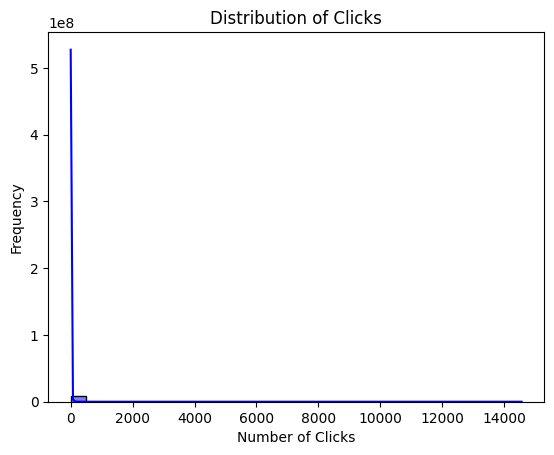

In [36]:
# Extract the number of clicks history into a list
clicks_data = user_interactions["numberOfClicksHistory"].apply(lambda x: [int(i) for i in x.split(",")]).explode().astype(int)

# Plot the bell curve
sns.histplot(clicks_data, kde=True, bins=30, color='blue')

# Add title and labels
plt.title('Distribution of Clicks')
plt.xlabel('Number of Clicks')
plt.ylabel('Frequency')

# Display the plot
plt.show()

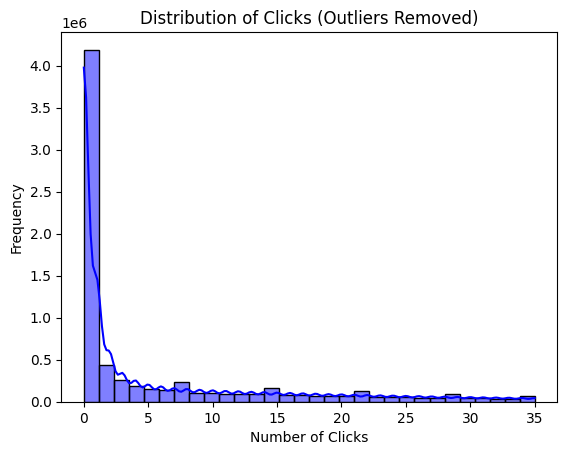

In [39]:
clicks_data = user_interactions["numberOfClicksHistory"].apply(lambda x: [int(i) for i in x.split(",")]).explode().astype(int)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(clicks_data, 25)
Q3 = np.percentile(clicks_data, 75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_clicks_data = clicks_data[(clicks_data >= lower_bound) & (clicks_data <= upper_bound)]

# Plot the bell curve for the filtered data
sns.histplot(filtered_clicks_data, kde=True, bins=30, color='blue')

# Add title and labels
plt.title('Distribution of Clicks (Outliers Removed)')
plt.xlabel('Number of Clicks')
plt.ylabel('Frequency')

# Display the plot
plt.show()